<a href="https://colab.research.google.com/github/kbrlslm/Data-Science-Project/blob/main/Data_Science_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# import libraries
from datetime import datetime as dt
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [38]:
# Download the dataset
# i) Clean Data for NYC_ARREST
# ii) Unemployment Data in NYC
# iii) GDP  in NYC
!gdown 1t6XrS3vdOfwGHlHafA2pek1Hfbuf3ObE
!gdown 1-2N7AbBI2sUNy7XbGcQKYrS8kKRW3wTt
!gdown 1ZTYw4aNzugVcHH1C_h8tIwczjCEur5Bd

Downloading...
From: https://drive.google.com/uc?id=1t6XrS3vdOfwGHlHafA2pek1Hfbuf3ObE
To: /content/data_clean.csv
100% 373M/373M [00:02<00:00, 184MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-2N7AbBI2sUNy7XbGcQKYrS8kKRW3wTt
To: /content/NYC_Unemployment.csv
100% 3.27k/3.27k [00:00<00:00, 5.21MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZTYw4aNzugVcHH1C_h8tIwczjCEur5Bd
To: /content/gdp.csv
100% 1.88k/1.88k [00:00<00:00, 3.00MB/s]


In [39]:
# import the dataset
df_un=pd.read_csv('NYC_Unemployment.csv')
df_gdp=pd.read_csv('gdp.csv')
df_crimerate=pd.read_csv('data_clean.csv')

**Linear Regression by Crime Rate Per Year**

In [40]:
# import libraries
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [98]:
ARREST_YEAR = pd.to_datetime(df_crimerate['ARREST_DATE']).dt.year

# make a dataframe to have crime rate per year (# of arrests / # NYC population) * 100000)
nyc_pop = 8175000 # according to 2010 census
per_100k = 100000

yearly_crime_rate = (((ARREST_YEAR.value_counts(ascending=True))/nyc_pop)*per_100k).rename_axis('ARREST_YEAR').reset_index(name='ARREST_COUNT')
yearly_crime_rate

,ARREST_YEAR,ARREST_COUNT
0,2020,1700.146789
1,2019,2606.593272
2,2018,2987.131498
3,2017,3472.207951
4,2016,3821.443425
5,2015,4124.685015
6,2006,4535.547401
7,2014,4720.183486
8,2013,4790.042813
9,2012,4818.911315


In [99]:
# get feature & target from dataframe
feature = yearly_crime_rate[['ARREST_YEAR']]
target = yearly_crime_rate[['ARREST_COUNT']]

# split data into training & test data
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.25)

Coefficients:  [[-201.92025661]]
Mean squared error: 205844.51829112018
Coefficient of determination: 0.4743587639160115
Score gotten from cross-validation: 0.4743587639160115


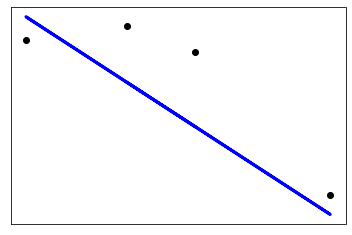

In [100]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Coefficients: ', reg.coef_)
print('Mean squared error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: {}'.format(r2_score(y_test, y_pred)))
print("Score gotten from cross-validation:",reg.score(X_test,y_test))

plt.scatter(X_test,y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### **Impact of Economic Factor on Crime**

### **GDP**

In [101]:
#Converting the datatype from object to datetime
df_crimerate['ARREST_DATE'] = pd.to_datetime(df_crimerate['ARREST_DATE'])

In [102]:
#Extracting the year and month
df_crimerate['ARREST_DATE'] = df_crimerate['ARREST_DATE'].dt.strftime('%Y')


In [103]:
#Counting the arrests based on individual month and year
ANNUAL_ARRESTS = df_crimerate['ARREST_DATE'].value_counts().rename_axis('ARREST_YEAR').reset_index(name='ARREST_COUNT')
#Sorting the values from 2006-01 to 2019-12
ANNUAL_ARRESTS=ANNUAL_ARRESTS.sort_values(by='ARREST_YEAR',ascending=True)
# fill the NaN value of the dataframe
ANNUAL_ARRESTS =  ANNUAL_ARRESTS.fillna(ANNUAL_ARRESTS.mean())
ANNUAL_ARRESTS

,ARREST_YEAR,ARREST_COUNT
8,2006,370781
3,2007,402125
4,2008,400272
1,2009,419816
0,2010,420555
2,2011,410938
5,2012,393946
6,2013,391586
7,2014,385875
9,2015,337193


In [104]:
#Setting up the target values for the model
Y=pd.DataFrame(ANNUAL_ARRESTS['ARREST_COUNT'])
Y['ARREST_COUNT']=Y['ARREST_COUNT'].tail(14)
Y.reset_index(drop=True,inplace=True)

In [105]:
#Dropping the arrest_count column from annual_arrests dataframe because we dont need that
#in the features
ANNUAL_ARRESTS.drop(['ARREST_COUNT'],inplace=True,axis=1)

In [106]:
#Adding an extra column in the annual_arrests dataframe
ANNUAL_ARRESTS['gdp_perc_change_from_prev_year']=df_gdp['gdp_perc_change_from_prev_year']


In [107]:
ANNUAL_ARRESTS.isna().sum().sum()

0

In [108]:
#Selecting the features
#Our features are Arrest year month and Unemployment Rate
X=pd.DataFrame(ANNUAL_ARRESTS)
X.reset_index(drop=True,inplace=True)

In [109]:
#Taking only year
X['ARREST_YEAR']=ANNUAL_ARRESTS['ARREST_YEAR']
X['ARREST_YEAR']=pd.to_datetime(X['ARREST_YEAR'])
X['ARREST_YEAR']=X['ARREST_YEAR'].dt.year
X['ARREST_YEAR']=X['ARREST_YEAR'].tail(14)

In [128]:
# Remove the NaN value for extra security
Y = Y.fillna(Y.mean()) 


In [135]:
#Filling up the null values with the last value
X['gdp_perc_change_from_prev_year']=X['gdp_perc_change_from_prev_year'].fillna(method ='bfill')
X['ARREST_YEAR']=X['ARREST_YEAR'].fillna(method ='bfill')
X['gdp_perc_change_from_prev_year']=X['gdp_perc_change_from_prev_year'].tail(14)

In [139]:
# Fill the NaN value if any
X = X.fillna(X.mean())

### **The following linear regression model calculates the future crime rate based on year and annual percent change of GDP in NYC.**

In [141]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Creating a linear Regression Model
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)
model.fit(X_train, Y_train)
prediction= model.predict(X_test)
Acc=model.score(X_test, Y_test)
print ("Accuracy={0:.2f}".format(Acc))

Accuracy=0.86


In [142]:
print('In 2045, if the average annual GDP percent change in NYC is +40%, then the regression predicts there will be',math.ceil(abs(model.predict([[2045,0.40]]))),'arrests that year')

print('In 2045, if the average annual GDP percent change in NYC is +1%, then the regression predicts there will be',math.ceil(abs(model.predict([[2045,0.01]]))),'arrests that year')


In 2045, if the average annual GDP percent change in NYC is +40%, then the regression predicts there will be 177564 arrests that year
In 2045, if the average annual GDP percent change in NYC is +1%, then the regression predicts there will be 178135 arrests that year


### **The model predicts that as average annual GDP percent change in NYC increases, arrest count will decrease.**

Text(0, 0.5, 'prediction')

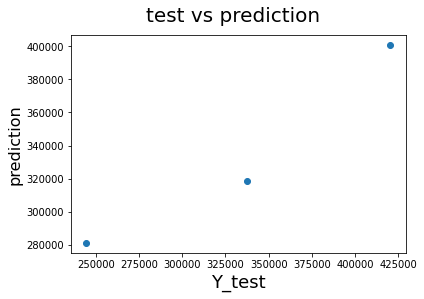

In [144]:
fig = plt.figure()
plt.scatter(Y_test,prediction)
fig.suptitle('test vs prediction', fontsize=20)            
plt.xlabel('Y_test', fontsize=18)                          
plt.ylabel('prediction', fontsize=16)  

### **Impact of Unemployment Factor on Crime Rate**

In [146]:
#Mapping the data values from object type to integer
df_un['Month'] = df_un['Month'].map({ 'January': 1,
                                                   'February': 2,
                                                   'March': 3,
                                                   'April': 4,
                                                    'May':5,
                                                     'June':6,
                                                     'July':7,
                                                     'August':8,
                                                     'September':9,
                                                     'October':10,
                                                     'November':11,
                                                     'December':12})

In [147]:
#Dropping the first 12 rows because those are values from 2005
#But we don't have arrest data from 2005 in our main dataset
df_un=df_un.drop(range(0,12))

In [149]:

#Converting the datatype from object to datetime
df_crimerate['ARREST_DATE'] = pd.to_datetime(df_crimerate['ARREST_DATE'])

In [150]:
#Extracting the year and month
df_crimerate['ARREST_DATE'] = df_crimerate['ARREST_DATE'].dt.strftime('%Y-%m')

In [151]:
#Counting the arrests based on individual month and year
daily_arrests_month = df_crimerate['ARREST_DATE'].value_counts().rename_axis('ARREST_MONTH').reset_index(name='ARREST_COUNT')

In [152]:
#Sorting the values from 2006-01 to 2020-12
daily_arrests_month=daily_arrests_month.sort_values(by='ARREST_MONTH',ascending=True)

In [153]:
#Setting up the target values for the model
Y=pd.DataFrame(daily_arrests_month['ARREST_COUNT'])
Y.reset_index(drop=True,inplace=True)

In [154]:
#Dropping the arrest_count column from daily_arrests_month dataframe because we dont need that
#in the features
daily_arrests_month.drop(['ARREST_COUNT'],inplace=True,axis=1)

In [155]:
#Adding an extra column in the daily_arrests_month dataframe
daily_arrests_month['Rate']=df_un['Rate']

In [156]:
#Selecting the features
#Our features are Arrest year month and Unemployment Rate
X=pd.DataFrame(daily_arrests_month)
X.reset_index(drop=True,inplace=True)

In [158]:
#Taking only year
X['ARREST_MONTH']=daily_arrests_month['ARREST_MONTH']
X['ARREST_MONTH']=pd.to_datetime(X['ARREST_MONTH'])
X['ARREST_MONTH']=X['ARREST_MONTH'].dt.year

In [159]:
#Filling up the null values with the last value
X['Rate']=X['Rate'].fillna(method ='bfill')

### **Below the LinearRegression model will calculate the future crime rate based on year and unemployment rate.**

In [182]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Creating a linear Regression Model
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)
model.fit(X_train, Y_train)
prediction= model.predict(X_test)
Acc=model.score(X_test, Y_test)
print ("Accuracy={0:.2f}".format(Acc))

Accuracy=0.93


In [183]:
def Linear_prediction(year,rate):
    import math
    pred=(math.ceil(abs(model.predict([[year,rate]]))))*12
    st='In the year of '+str(year)+ ' if the average unemployment rate of NYC is '+str(rate*100)+'% then there will be '+str(pred)+' crime'
    return st
print(Linear_prediction(2045,.01))
print(Linear_prediction(2045,.88))

In the year of 2045 if the average unemployment rate of NYC is 1.0% then there will be 8057496 crime
In the year of 2045 if the average unemployment rate of NYC is 88.0% then there will be 115513848 crime


### **So based on our model prediction, the crime rate will rise, if the unemployment rate rises.**

Text(0, 0.5, 'prediction')

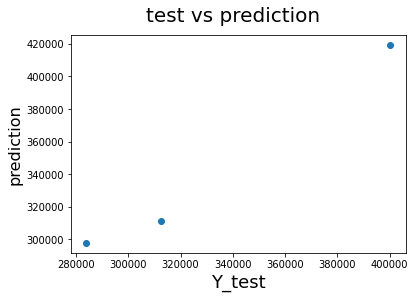

In [184]:
fig = plt.figure()
plt.scatter(Y_test,prediction)
fig.suptitle('test vs prediction', fontsize=20)            
plt.xlabel('Y_test', fontsize=18)                          
plt.ylabel('prediction', fontsize=16) 